## Quiero revisar que tan presiso es el método.

Cuando calculamos orbitas de periodo rande es posible que la órbita completa sea difícil de observar ya que dependerá de la presición con la que se calcule en cuántas iteraciones de ese punto podemos confiar. Con el objetivo de medir de alguna forma esto lo que haré es medir el error de la órbita usando el periodo. 
$$E(p_{0},p_{n},f) = |p_{0}-f^{n}(p_{n})|$$
donde $n$ es el periodo del punto $p_{0}$ encontrado.

In [2]:
#paqueterias predefinidas de julia
using PyPlot
using SymPy
using TaylorSeries
using StaticArrays
using PyCall
using LaTeXStrings
using LinearAlgebra
using ForwardDiff

In [3]:
#importamos las implementaciones, del metodo de parametrizacion y del metodo de puntos fijos.
push!(LOAD_PATH,"/home/eve/Documents/Tesis-v-1.0.2/Programas/IPM")
push!(LOAD_PATH,"/home/eve/Documents/Matematicas/Proyectos/Implementacion")

5-element Array{String,1}:
 "@"
 "@v#.#"
 "@stdlib"
 "/home/eve/Documents/Tesis-v-1.0.2/Programas/IPM"
 "/home/eve/Documents/Matematicas/Proyectos/Implementacion"

In [4]:
# importamos los modulos locales.
using ParametrizacionMetodo
using PeriodicosSymmetries

🔵 Definimos el mapeo

In [5]:
function EstandardMapK(r,k)
    x = r[1]
    y = r[2]
    vx = x + y - (k*sin(2*pi*x))/(2*pi)
    vy =  y - (k*sin(2*pi*x))/(2*pi)
    return [vx,vy]
end

EstandardMapK (generic function with 1 method)

In [6]:
#definimos las simetrias, las necesitamos en forma de vector y en forma de función
simetria1v(x,y) = [0,y]
simetria2v(x,y) = [1/2,y]
simetria3v(x,y) = [y/2,y]
simetria4v(x,y) = [(y+1)/2.0,y]
simetria1f(x,y) = x
simetria2f(x,y) = x-1/2.0
simetria3f(x,y) = x-(y/2)
simetria4f(x,y) = x-(y+1)/2.0


simetria4f (generic function with 1 method)

In [7]:
#definimos unas listas que serán las línea de simetría del mapeo.
listasim1Y = [y for y in 0.0:0.1:1.0] 
listasim1X = [0.0 for y in listasim1Y]
listasim2X = [1/2 for y in listasim1Y]
listasim3X = [y/2 for y in listasim1Y]
listasim4X = [(y+1.0)/2 for y in listasim1Y];

🔵 Definimos un mapeo para graficar el espacio fase para diferentes puntos. 

In [8]:
function IterarMap(f, x_ini, n)   #Definimos una función para iterar el mapeo

    x = x_ini[1]                      #                                     #Damos condiciones iniciales
    y = x_ini[2]                          #
    
    iteradosMapX = [x]
    iteradosMapY = [y]               #Definimos dos listas que tendran los valores de cada par ordenado de theta y P, y agregamos las condiciones iniciales

    for i=0:n              #iniciamos un ciclo de iteraciones donde se calculan x_n, y_n y se agregan a lalista correspodiente
        F = f(x,y)

        push!(iteradosMapX,F[1])
        push!(iteradosMapY,F[2])
        
       x = F[1]
       y = F[2]

    end

    return iteradosMapX, iteradosMapY  #La funcion iterados regresa las listas que corresponden a la trayectoria del

end



IterarMap (generic function with 1 method)

In [9]:

#para graficarlo
function GraficarEstandarMap(f)
    n = 50
    s = 1/20.
    i=0.
    for p_i=0:s:1
        for x_i =0:s:1
            i=i+1
            x_ini=[p_i,x_i]
            a,b = IterarMap(f,x_ini,n)
            p = scatter(a,b,marker=".",s=0.1,color="gray")
            
        end
    end

end

GraficarEstandarMap (generic function with 1 method)

In [10]:
#Definimos una función para iterar el mapeo y usar la función de iterar.
function Estandar(x::Any,y::Any,k::Real)
    x_n =mod(x+y-k*sin(2*pi*x)/2pi,1)
    y_n =mod(y-k*sin(2*pi*x)/2pi,1)
    return [x_n,y_n]
end

Estandar (generic function with 1 method)

In [11]:
#como en este caso vamos a trabajar con varios valores del parámetro definimos una función para un 
# parámetro fijo 
Estandar0(x,y)=Estandar(x,y,0.0)

Estandar0 (generic function with 1 method)

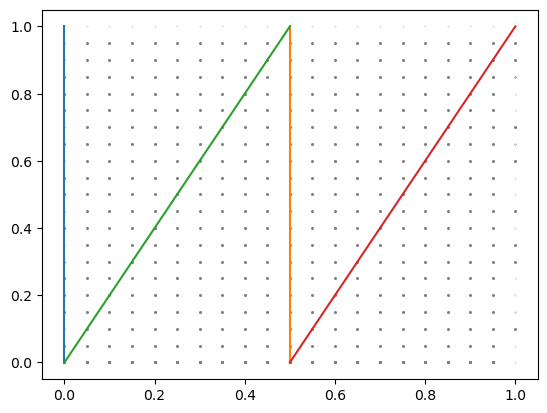

1-element Array{PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f89f43dc610>

In [12]:
GraficarEstandarMap(Estandar0)
plot(listasim1X, listasim1Y, label = "")
plot(listasim2X, listasim1Y, label = "")
plot(listasim3X, listasim1Y, label = "")
plot(listasim4X, listasim1Y, label = "")


🔵 Defino mapeos para ciertos valores del parámetro. 

In [13]:
#definimos funciones para el mapeo iterado.
Estandar1(x,y)=Estandar(x,y,0.01)
Estandar2(x,y)=Estandar(x,y,0.02)
Estandar3(x,y)=Estandar(x,y,0.03)
Estandar4(x,y)=Estandar(x,y,0.04)
Estandar5(x,y)=Estandar(x,y,0.05)
Estandar6(x,y)=Estandar(x,y,0.06)
Estandar7(x,y)=Estandar(x,y,0.07)
Estandar8(x,y)=Estandar(x,y,0.08)
Estandar9(x,y)=Estandar(x,y,0.09)
Estandar10(x,y)=Estandar(x,y,0.1)
Estandar11(x,y)=Estandar(x,y,0.2)
Estandar12(x,y)=Estandar(x,y,0.3)
Estandar13(x,y)=Estandar(x,y,0.4)

Estandar13 (generic function with 1 method)

In [14]:
#funciones que se usan en el método de puntos periódicos
EstandardMap0(x) = EstandardMapK(x,0.0)
EstandardMap1(x) = EstandardMapK(x,0.01)
EstandardMap2(x) = EstandardMapK(x,0.02)
EstandardMap3(x) = EstandardMapK(x,0.03)
EstandardMap4(x) = EstandardMapK(x,0.04)
EstandardMap5(x) = EstandardMapK(x,0.05)
EstandardMap6(x) = EstandardMapK(x,0.06)
EstandardMap7(x) = EstandardMapK(x,0.07)
EstandardMap8(x) = EstandardMapK(x,0.08)
EstandardMap9(x) = EstandardMapK(x,0.09)
EstandardMap10(x) = EstandardMapK(x,0.1)
EstandardMap11(x) = EstandardMapK(x,0.2)
EstandardMap12(x) = EstandardMapK(x,0.3)
EstandardMap13(x) = EstandardMapK(x,0.4)

EstandardMap13 (generic function with 1 method)

🔵 Experimentamos con puntos de diferente periodo.

In [15]:
#periodo 2
periodo2E1 = periodicosN(EstandardMap1,simetria3v,simetria4f,1,0.5)

2-element Array{Float64,1}:
 0.25039788611434016
 0.5007957722286803

In [16]:
#usamos la función composition que esta definida en el modulo para calcular la 
# 2da iteración del punto encontrado.
EstandardMap_per2(v) =  composition(EstandardMap1,2)(v)

EstandardMap_per2 (generic function with 1 method)

In [17]:
#Calculamos la diferencia 
Error = mod(norm(periodo2E1-EstandardMap_per2(periodo2E1)),1)

2.220446049250313e-16

🔵 Si buscamos con un periodo más significativo, por ejemplo 100.

In [18]:
periodo100E1 = periodicosN(EstandardMap0,simetria1v,simetria2f,50,1/100)

2-element Array{Float64,1}:
 0.0
 0.01

In [19]:
Buscaperiodo(periodo100E1,EstandardMap0,1,1e-10)

periodo = 

100.0

In [20]:
EstandardMap0_per100(v) =  composition(EstandardMap0,100)(v)

EstandardMap0_per100 (generic function with 1 method)

In [21]:
Error = mod(norm(periodo100E1-EstandardMap0_per100(periodo100E1)),1)

6.661338147750939e-16

🔵 En este caso el error sigue siendo muy pequeño pero ya notable. 

In [22]:
#periodo 99
periodo99E0 = periodicosN(EstandardMap0,simetria1v,simetria4f,50,0.1)
Buscaperiodo(periodo99E0,EstandardMap0,1,1e-10)

periodo = 

99.0

In [23]:
EstandardMap0_per99(v) =  composition(EstandardMap0,99)(v)

EstandardMap0_per99 (generic function with 1 method)

In [24]:
Error = mod(norm(periodo99E0-EstandardMap0_per99(periodo99E0)),1)

0.9999999999999976

🔵 Por ejemplo en el caso anterior el error es de 1 después de las 99 iteraciones.

In [25]:
#Periodo 90
periodo91E0 = periodicosN(EstandardMap0,simetria1v,simetria4f,46,0.0101)
Buscaperiodo(periodo91E0,EstandardMap0,1,1e-10)

periodo = 

91.0

In [26]:
EstandardMap0_per91(v) =  composition(EstandardMap0,91)(v)
Error = mod(norm(periodo91E0-EstandardMap0_per91(periodo91E0)),1)

0.9999999999999984

🔵 Tambien en este caso el error es de 1 unidad después de las 100 iteraciones.

In [27]:
periodo80E0 = periodicosN(EstandardMap0,simetria1v,simetria2f,40,1/80.0)
Buscaperiodo(periodo80E0,EstandardMap0,1,1e-10)

periodo = 

80.0

In [28]:
EstandardMap0_per80(v) =  composition(EstandardMap0,80)(v)
Error = min(mod(norm(periodo80E0-EstandardMap0_per80(periodo80E0)),1),abs(1-mod(norm(periodo80E0-EstandardMap0_per80(periodo80E0)),1)))

1.5543122344752192e-15

In [29]:
Errorf(pini, mapeoi)= min(mod(norm(pini-mapeoi(pini)),1),abs(1-mod(norm(pini-mapeoi(pini)),1)))

Errorf (generic function with 1 method)

In [30]:
Errorf(periodo80E0,EstandardMap0_per80)

1.5543122344752192e-15

In [31]:
periodo80E0-EstandardMap0_per80(periodo80E0)

2-element Array{Float64,1}:
 -0.9999999999999984
  0.0

In [32]:
print("p inicial= ",periodo80E0, '\t',"p final=",EstandardMap0_per80(periodo80E0) )

p inicial= [0.0, 0.0125]	p final=[0.9999999999999984, 0.0125]

🔵 en realidad no es que el error sea de uno si no que por el modulo no se alcanza a percibir. 

In [33]:
#periodo79
periodo79E0 = periodicosN(EstandardMap0,simetria1v,simetria4f,40,1/80.0)
Buscaperiodo(periodo79E0,EstandardMap0,1,1e-10)

periodo = 

79.0

In [34]:
EstandardMap0_per79(v) =  composition(EstandardMap0,79)(v)
Errorf(periodo79E0,EstandardMap0_per79)

3.1086244689504383e-15

In [35]:
#periodo 70
periodo70E0 = periodicosN(EstandardMap0,simetria1v,simetria2f,35,1/70.0)
Buscaperiodo(periodo70E0,EstandardMap0,1,1e-10)

periodo = 

70.0

In [36]:
EstandardMap0_per70(v) =  composition(EstandardMap0,70)(v)
Errorf(periodo70E0,EstandardMap0_per70)

1.6653345369377348e-15

In [37]:
#periodo 69
periodo69E0 = periodicosN(EstandardMap0,simetria1v,simetria4f,35,1/70.0)
Buscaperiodo(periodo69E0,EstandardMap0,1,1e-10)

periodo = 

69.0

In [38]:
EstandardMap0_per69(v) =  composition(EstandardMap0,69)(v)
Errorf(periodo69E0,EstandardMap0_per69)

1.6653345369377348e-15

In [39]:
#periodo 60
periodo60E0 = periodicosN(EstandardMap0,simetria1v,simetria2f,30,1/60.0)
Buscaperiodo(periodo60E0,EstandardMap0,1,1e-10)

periodo = 

60.0

In [40]:
EstandardMap0_per60(v) =  composition(EstandardMap0,60)(v)
Errorf(periodo60E0,EstandardMap0_per60)

1.3322676295501878e-15

In [41]:
#periodo 59
periodo59E0 = periodicosN(EstandardMap0,simetria2v,simetria3f,30,1/60.0)
Buscaperiodo(periodo59E0,EstandardMap0,1,1e-10)

periodo = 

59.0

In [42]:
EstandardMap0_per59(v) =  composition(EstandardMap0,59)(v)
Errorf(periodo59E0,EstandardMap0_per59)

6.661338147750939e-16

In [43]:
#periodo 50
periodo50E0 = periodicosN(EstandardMap0,simetria3v,simetria4f,25,1/50.0)
Buscaperiodo(periodo50E0,EstandardMap0,1,1e-10)

periodo = 

50.0

In [44]:
EstandardMap0_per50(v) =  composition(EstandardMap0,50)(v)
Errorf(periodo50E0,EstandardMap0_per50)

4.440892098500626e-16

In [45]:
#periodo 49
periodo49E0 = periodicosN(EstandardMap0,simetria2v,simetria3f,25,1/50.0)
Buscaperiodo(periodo49E0,EstandardMap0,1,1e-10)

periodo = 

49.0

In [46]:
EstandardMap0_per49(v) =  composition(EstandardMap0,49)(v)
Errorf(periodo49E0,EstandardMap0_per49)

4.440892098500626e-16

In [47]:
#periodo 40
periodo40E0 = periodicosN(EstandardMap0,simetria3v,simetria4f,20,1/40.0)
Buscaperiodo(periodo40E0,EstandardMap0,1,1e-10)

periodo = 

40.0

In [48]:
EstandardMap0_per40(v) =  composition(EstandardMap0,40)(v)
Errorf(periodo40E0,EstandardMap0_per40)

6.661338147750939e-16

In [49]:
#periodo 39
periodo39E0 = periodicosN(EstandardMap0,simetria1v,simetria4f,20,1/40.0)
Buscaperiodo(periodo39E0,EstandardMap0,1,1e-10)

periodo = 

39.0

In [50]:
EstandardMap0_per39(v) =  composition(EstandardMap0,39)(v)
Errorf(periodo39E0,EstandardMap0_per39)

4.440892098500626e-16

In [51]:
#periodo 30
periodo30E0 = periodicosN(EstandardMap0,simetria1v,simetria2f,15,1/30.0)
Buscaperiodo(periodo30E0,EstandardMap0,1,1e-10)

periodo = 

30.0

In [52]:
EstandardMap0_per30(v) =  composition(EstandardMap0,30)(v)
Errorf(periodo30E0,EstandardMap0_per30)

1.1102230246251565e-16

In [53]:
#periodo 29
periodo29E0 = periodicosN(EstandardMap0,simetria1v,simetria4f,15,1/30.0)
Buscaperiodo(periodo29E0,EstandardMap0,1,1e-10)

periodo = 

29.0

In [54]:
EstandardMap0_per29(v) =  composition(EstandardMap0,29)(v)
Errorf(periodo29E0,EstandardMap0_per29)

9.992007221626409e-16

In [55]:
#periodo 20
periodo20E0 = periodicosN(EstandardMap0,simetria1v,simetria2f,10,1/20.0)
Buscaperiodo(periodo20E0,EstandardMap0,1,1e-10)


periodo = 

20.0

In [56]:
EstandardMap0_per20(v) =  composition(EstandardMap0,20)(v)
Errorf(periodo20E0,EstandardMap0_per20)

2.220446049250313e-16

In [57]:
#periodo19
periodo19E0 = periodicosN(EstandardMap0,simetria1v,simetria4f,10,1/20.0)
Buscaperiodo(periodo19E0,EstandardMap0,1,1e-10)

periodo = 

19.0

In [58]:
EstandardMap0_per19(v) =  composition(EstandardMap0,19)(v)
Errorf(periodo19E0,EstandardMap0_per19)

6.661338147750939e-16

In [59]:
#periodo18
periodo18E0 = periodicosN(EstandardMap0,simetria1v,simetria2f,9,1/18.0)
Buscaperiodo(periodo18E0,EstandardMap0,1,1e-10)

periodo = 

18.0

In [60]:
EstandardMap0_per18(v) =  composition(EstandardMap0,18)(v)
Errorf(periodo18E0,EstandardMap0_per18)

2.220446049250313e-16

In [61]:
#periodo17
periodo17E0 = periodicosN(EstandardMap0,simetria1v,simetria4f,9,1/17.0)
Buscaperiodo(periodo17E0,EstandardMap0,1,1e-10)

periodo = 

17.0

In [62]:
EstandardMap0_per17(v) =  composition(EstandardMap0,17)(v)
Errorf(periodo17E0,EstandardMap0_per17)

0.0

In [63]:
#periodo16
periodo16E0 = periodicosN(EstandardMap0,simetria3v,simetria4f,8,1/16.0)
Buscaperiodo(periodo16E0,EstandardMap0,1,1e-10)

periodo = 

16.0

In [64]:
EstandardMap0_per16(v) =  composition(EstandardMap0,16)(v)
Errorf(periodo16E0,EstandardMap0_per16)

0.0

In [65]:
#periodo15
periodo15E0 = periodicosN(EstandardMap0,simetria1v,simetria4f,8,1/15.0)
Buscaperiodo(periodo15E0,EstandardMap0,1,1e-10)

periodo = 

15.0

In [66]:
EstandardMap0_per15(v) =  composition(EstandardMap0,15)(v)
Errorf(periodo15E0,EstandardMap0_per15)

1.1102230246251565e-16

In [67]:
#periodo14
periodo14E0 = periodicosN(EstandardMap0,simetria1v,simetria2f,7,1/14.0)
Buscaperiodo(periodo14E0,EstandardMap0,1,1e-10)

periodo = 

14.0

In [68]:
EstandardMap0_per14(v) =  composition(EstandardMap0,14)(v)
Errorf(periodo14E0,EstandardMap0_per14)

3.3306690738754696e-16

In [69]:
#periodo13
periodo13E0 = periodicosN(EstandardMap0,simetria1v,simetria4f,7,1/13.0)
Buscaperiodo(periodo13E0,EstandardMap0,1,1e-10)

periodo = 

13.0

In [70]:
EstandardMap0_per13(v) =  composition(EstandardMap0,13)(v)
Errorf(periodo13E0,EstandardMap0_per13)

2.220446049250313e-16

In [71]:
#periodo12
periodo12E0 = periodicosN(EstandardMap0,simetria1v,simetria2f,6,1/12.0)
Buscaperiodo(periodo12E0,EstandardMap0,1,1e-10)

periodo = 

12.0

In [72]:
EstandardMap0_per12(v) =  composition(EstandardMap0,12)(v)
Errorf(periodo12E0,EstandardMap0_per12)

0.0

In [73]:
#periodo10
periodo10E0 = periodicosN(EstandardMap0,simetria1v,simetria2f,5,1/10.0)
Buscaperiodo(periodo10E0,EstandardMap0,1,1e-10)

periodo = 

10.0

In [74]:
EstandardMap0_per10(v) =  composition(EstandardMap0,10)(v)
Errorf(periodo10E0,EstandardMap0_per10)

1.1102230246251565e-16

In [75]:
#periodo 90 con ep 0.01
#tome la semilla del punto de periodo 90 en el mapeo con ep =0
periodo90E1 = periodicosN(EstandardMap1,simetria1v,simetria2f,45,0.010989010989010985)
Buscaperiodo(periodo90E1,EstandardMap1,1,1e-10)

periodo = 

90.0

In [76]:
EstandardMap1_per90(v) =  composition(EstandardMap1,90)(v)
Errorf(periodo90E1,EstandardMap1_per90)

3.885780586188048e-14

🔵 Aqui vemos que comparado con el error de la órbita de periodo 90 con epsilon igual a 0 si hay una gran diferencia. 

In [77]:
#periodo 80 con ep 0.01
#tome la semilla del punto de periodo 80 en el mapeo con ep =0
periodo80E1 = periodicosN(EstandardMap1,simetria1v,simetria2f,40,periodo80E0[2])
Buscaperiodo(periodo80E1,EstandardMap1,1,1e-10)

periodo = 

80.0

In [78]:
EstandardMap1_per80(v) =  composition(EstandardMap1,80)(v)
Errorf(periodo80E1,EstandardMap1_per80)

7.438494264988549e-15

In [79]:
#periodo 79 con ep 0.01
#tome la semilla del punto de periodo 80 en el mapeo con ep =0
periodo79E1 = periodicosN(EstandardMap1,simetria1v,simetria4f,40,periodo79E0[2])
Buscaperiodo(periodo79E1,EstandardMap1,1,1e-10)

periodo = 

79.0

In [80]:
EstandardMap1_per79(v) =  composition(EstandardMap1,79)(v)
Errorf(periodo79E1,EstandardMap1_per79)

9.103828801926284e-15

In [81]:
#periodo 60 con ep 0.01
#tome la semilla del punto de periodo 60 en el mapeo con ep =0
periodo60E1 = periodicosN(EstandardMap1,simetria1v,simetria2f,30,periodo60E0[2])
Buscaperiodo(periodo60E1,EstandardMap1,1,1e-10)

periodo = 

60.0

In [82]:
EstandardMap1_per60(v) =  composition(EstandardMap1,60)(v)
Errorf(periodo60E1,EstandardMap1_per60)

4.551914400963142e-15

In [83]:
#periodo 59 con ep 0.01
#tome la semilla del punto de periodo 59 en el mapeo con ep =0
periodo59E1 = periodicosN(EstandardMap1,simetria1v,simetria4f,30,periodo59E0[2])
Buscaperiodo(periodo59E1,EstandardMap1,1,1e-10)

periodo = 

59.0

In [84]:
EstandardMap1_per59(v) =  composition(EstandardMap1,59)(v)
Errorf(periodo59E1,EstandardMap1_per59)

6.439293542825908e-15

In [85]:
#periodo 50 con ep 0.01
#tome la semilla del punto de periodo 50 en el mapeo con ep =0
periodo50E1 = periodicosN(EstandardMap1,simetria1v,simetria2f,25,periodo50E0[2])
Buscaperiodo(periodo50E1,EstandardMap1,1,1e-10)

periodo = 

50.0

In [86]:
EstandardMap1_per50(v) =  composition(EstandardMap1,50)(v)
Errorf(periodo50E1,EstandardMap1_per50)

2.6645352591003757e-15

In [87]:
#periodo 49 con ep 0.01
#tome la semilla del punto de periodo 50 en el mapeo con ep =0
periodo49E1 = periodicosN(EstandardMap1,simetria1v,simetria4f,25,periodo49E0[2])
Buscaperiodo(periodo49E1,EstandardMap1,1,1e-10)

periodo = 

49.0

In [88]:
EstandardMap1_per49(v) =  composition(EstandardMap1,49)(v)
Errorf(periodo49E1,EstandardMap1_per49)

1.7763568394002505e-15

In [89]:
#periodo 40 con ep 0.01
#tome la semilla del punto de periodo 40 en el mapeo con ep =0
periodo40E1 = periodicosN(EstandardMap1,simetria1v,simetria2f,20,periodo40E0[2])
Buscaperiodo(periodo40E1,EstandardMap1,1,1e-10)

periodo = 

40.0

In [90]:
EstandardMap1_per40(v) =  composition(EstandardMap1,40)(v)
Errorf(periodo40E1,EstandardMap1_per40)

1.3322676295501878e-15

In [91]:
#periodo 39 con ep 0.01
#tome la semilla del punto de periodo 40 en el mapeo con ep =0
periodo39E1 = periodicosN(EstandardMap1,simetria1v,simetria4f,20,periodo39E0[2])
Buscaperiodo(periodo39E1,EstandardMap1,1,1e-10)

periodo = 

39.0

In [92]:
EstandardMap1_per39(v) =  composition(EstandardMap1,39)(v)
Errorf(periodo39E1,EstandardMap1_per39)

2.220446049250313e-16

In [93]:
#periodo 30 con ep 0.01
#tome la semilla del punto de periodo 40 en el mapeo con ep =0
periodo30E1 = periodicosN(EstandardMap1,simetria1v,simetria2f,15,periodo30E0[2])
Buscaperiodo(periodo30E1,EstandardMap1,1,1e-10)

periodo = 

30.0

In [94]:
EstandardMap1_per30(v) =  composition(EstandardMap1,30)(v)
Errorf(periodo30E1,EstandardMap1_per30)

2.220446049250313e-16

In [95]:
#periodo 29 con ep 0.01
#tome la semilla del punto de periodo 40 en el mapeo con ep =0
periodo29E1 = periodicosN(EstandardMap1,simetria1v,simetria4f,15,periodo29E0[2])
Buscaperiodo(periodo29E1,EstandardMap1,1,1e-10)

periodo = 

29.0

In [96]:
EstandardMap1_per29(v) =  composition(EstandardMap1,29)(v)
Errorf(periodo29E1,EstandardMap1_per29)

1.1102230246251565e-16

In [97]:
#periodo 26 con ep 0.01
#tome la semilla del punto de periodo 40 en el mapeo con ep =0
periodo26E1 = periodicosN(EstandardMap1,simetria1v,simetria2f,13,periodo20E0[2])
Buscaperiodo(periodo26E1,EstandardMap1,1,1e-10)

periodo = 

26.0

In [98]:
EstandardMap1_per26(v) =  composition(EstandardMap1,26)(v)
Errorf(periodo26E1,EstandardMap1_per26)

0.0

In [99]:
#periodo 26 con ep 0.01
#tome la semilla del punto de periodo 40 en el mapeo con ep =0
periodo24E1 = periodicosN(EstandardMap1,simetria1v,simetria2f,12,periodo20E0[2])
Buscaperiodo(periodo24E1,EstandardMap1,1,1e-10)

periodo = 

24.0

In [100]:
EstandardMap1_per24(v) =  composition(EstandardMap1,24)(v)
Errorf(periodo24E1,EstandardMap1_per24)

2.220446049250313e-16

In [101]:
#periodo 20 con ep 0.01
#tome la semilla del punto de periodo 40 en el mapeo con ep =0
periodo20E1 = periodicosN(EstandardMap1,simetria1v,simetria2f,10,periodo20E0[2])
Buscaperiodo(periodo20E1,EstandardMap1,1,1e-10)

periodo = 

20.0

In [102]:
EstandardMap1_per20(v) =  composition(EstandardMap1,20)(v)
Errorf(periodo20E1,EstandardMap1_per20)

1.5543122344752192e-15

In [103]:
#periodo 20 con ep 0.01
#tome la semilla del punto de periodo 40 en el mapeo con ep =0
periodo19E1 = periodicosN(EstandardMap1,simetria1v,simetria4f,10,periodo19E0[2])
Buscaperiodo(periodo19E1,EstandardMap1,1,1e-10)

periodo = 

19.0

In [104]:
EstandardMap1_per19(v) =  composition(EstandardMap1,19)(v)
Errorf(periodo19E1,EstandardMap1_per19)

2.220446049250313e-16

In [105]:
#periodo 20 con ep 0.01
#tome la semilla del punto de periodo 40 en el mapeo con ep =0
periodo18E1 = periodicosN(EstandardMap1,simetria1v,simetria2f,9,periodo18E0[2])
Buscaperiodo(periodo18E1,EstandardMap1,1,1e-10)

periodo = 

18.0

In [106]:
EstandardMap1_per18(v) =  composition(EstandardMap1,18)(v)
Errorf(periodo18E1,EstandardMap1_per18)

4.440892098500626e-16

In [107]:
#periodo 17 con ep 0.01
#tome la semilla del punto de periodo 40 en el mapeo con ep =0
periodo17E1 = periodicosN(EstandardMap1,simetria1v,simetria4f,9,periodo17E0[2])
Buscaperiodo(periodo17E1,EstandardMap1,1,1e-10)

periodo = 

17.0

In [108]:
EstandardMap1_per17(v) =  composition(EstandardMap1,17)(v)
Errorf(periodo17E1,EstandardMap1_per17)

0.0

In [109]:
#periodo 16 con ep 0.01
#tome la semilla del punto de periodo 40 en el mapeo con ep =0
periodo16E1 = periodicosN(EstandardMap1,simetria1v,simetria2f,8,periodo16E0[2])
Buscaperiodo(periodo16E1,EstandardMap1,1,1e-10)

periodo = 

16.0

In [110]:
EstandardMap1_per16(v) =  composition(EstandardMap1,16)(v)
Errorf(periodo16E1,EstandardMap1_per16)

4.440892098500626e-16

In [111]:
#periodo 15 con ep 0.01
#tome la semilla del punto de periodo 40 en el mapeo con ep =0
periodo15E1 = periodicosN(EstandardMap1,simetria1v,simetria4f,8,periodo15E0[2])
Buscaperiodo(periodo15E1,EstandardMap1,1,1e-10)

periodo = 

15.0

In [112]:
EstandardMap1_per15(v) =  composition(EstandardMap1,15)(v)
Errorf(periodo15E1,EstandardMap1_per15)

2.220446049250313e-16

In [113]:
#periodo 14 con ep 0.01
#tome la semilla del punto de periodo 40 en el mapeo con ep =0
periodo14E1 = periodicosN(EstandardMap1,simetria1v,simetria2f,7,periodo14E0[2])
Buscaperiodo(periodo14E1,EstandardMap1,1,1e-10)

periodo = 

14.0

In [114]:
EstandardMap1_per14(v) =  composition(EstandardMap1,14)(v)
Errorf(periodo14E1,EstandardMap1_per14)

1.1102230246251565e-16

In [115]:
#periodo 14 con ep 0.01
#tome la semilla del punto de periodo 40 en el mapeo con ep =0
periodo13E1 = periodicosN(EstandardMap1,simetria1v,simetria4f,7,periodo13E0[2])
Buscaperiodo(periodo13E1,EstandardMap1,1,1e-10)

periodo = 

13.0

In [116]:
EstandardMap1_per13(v) =  composition(EstandardMap1,13)(v)
Errorf(periodo13E1,EstandardMap1_per13)

2.220446049250313e-16

In [117]:
#periodo 12 con ep 0.01
#tome la semilla del punto de periodo 40 en el mapeo con ep =0
periodo12E1 = periodicosN(EstandardMap1,simetria1v,simetria2f,6,periodo12E0[2])
Buscaperiodo(periodo12E1,EstandardMap1,1,1e-10)

periodo = 

12.0

In [118]:
EstandardMap1_per12(v) =  composition(EstandardMap1,12)(v)
Errorf(periodo12E1,EstandardMap1_per12)

0.0

In [119]:
#periodo 11 con ep 0.01
#tome la semilla del punto de periodo 40 en el mapeo con ep =0
periodo10E1 = periodicosN(EstandardMap1,simetria1v,simetria2f,5,periodo10E0[2])
Buscaperiodo(periodo10E1,EstandardMap1,1,1e-10)

periodo = 

10.0

In [120]:
EstandardMap1_per10(v) =  composition(EstandardMap1,10)(v)
Errorf(periodo10E1,EstandardMap1_per10)

0.0

🔷 Ahora ya podemos elegir las órbitas que son hiperbólicas y aplicarles el método de parametrización. 

### Para hacer eso creo una funcion que determina la estabilidad

In [121]:
using SymPy

In [122]:
x = symbols("x")
y = symbols("y")

y

In [123]:
function jacobianosym(func)
    x = symbols("x")
    y = symbols("y")
    X = func
    Y = [x,y]
    j = X.jacobian(Y)
    return j
end
    
        
    

jacobianosym (generic function with 1 method)

In [140]:
function jacobianeval(jacobiano,punto)
    #N(subs(subs(X.jacobian(Y)[4],phi,1),rho,1))
    m1 = N(subs(subs(jacobiano[1],x,punto[1]),y,punto[2]))
    m2 = N(subs(subs(jacobiano[2],x,punto[1]),y,punto[2]))
    m3 = N(subs(subs(jacobiano[3],x,punto[1]),y,punto[2]))
    m4 = N(subs(subs(jacobiano[4],x,punto[1]),y,punto[2]))
    return [[m1 m2];[m3 m4]]
end

jacobianeval (generic function with 1 method)

In [141]:
function determinaestabilidad(punto,funcv,mapeo,n)
    jacobi = jacobianosym(funcv)
    m = Matrix(I,2,2)
    for i in 1:n
        m_n = jacobianeval(jacobi, punto)
        punto = mapeo(punto)
        m = m*m_n
    end
    E = eigen(m)
    values1 = [abs(E.values[1]),abs(E.values[2])]
    values1 = sort(values1)
    if (abs(values1[1])<1) && (abs(values1[2])>1)
        print("el punto es hiperbólico")
    else
        print("el punto no es hiperbólico")
    end
    return E
end
         

determinaestabilidad (generic function with 1 method)

probamos con una funcion

In [142]:
fff(v) = [v[1]*v[2]+2*v[1],3*v[1]-6*v[2]^2]

fff (generic function with 1 method)

In [143]:
@time determinaestabilidad([0.0,0.0],[x*y+2x,3x-6y^2], fff,50)

el punto es hiperbólico  2.725667 seconds (8.00 M allocations: 387.565 MiB, 3.77% gc time)


Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 0.0
 1.125899906842624e15
vectors:
2×2 Array{Float64,2}:
 -0.83205  1.0
  0.5547   0.0

🔵 Ahora usamos las funciones que ya tenemos. 

In [144]:
determinaestabilidad(periodo99E0,[x+y-0.0*sin(2*pi*x)/2pi,y-0.0*sin(2*pi*x)/2pi], EstandardMap0,99)

el punto no es hiperbólico

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 1.0
 1.0
vectors:
2×2 Array{Float64,2}:
 0.0   2.24287e-18
 1.0  -1.0

In [145]:
determinaestabilidad(periodo90E1,[x+y-0.01*sin(2*pi*x)/2pi,y-0.01*sin(2*pi*x)/2pi], EstandardMap1,90)

el punto no es hiperbólico

Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
values:
2-element Array{Complex{Float64},1}:
 0.9999999999378226 - 1.1184953457388827e-5im
 0.9999999999378226 + 1.1184953457388827e-5im
vectors:
2×2 Array{Complex{Float64},2}:
 -0.00499994-1.09506e-9im  -0.00499994+1.09506e-9im
    0.999988-0.0im            0.999988+0.0im

🟪 Punto hiperbolico de periodo 80

In [146]:
determinaestabilidad(periodo80E1,[x+y-0.01*sin(2*pi*x)/2pi,y-0.01*sin(2*pi*x)/2pi], EstandardMap1,80)

el punto es hiperbólico

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 0.9999969265235933
 1.0000030734853027
vectors:
2×2 Array{Float64,2}:
 -0.00499994   0.00499994
  0.999988    -0.999988

In [147]:
determinaestabilidad(periodo79E1,[x+y-0.01*sin(2*pi*x)/2pi,y-0.01*sin(2*pi*x)/2pi], EstandardMap1,79)

el punto no es hiperbólico

Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
values:
2-element Array{Complex{Float64},1}:
 0.9999999999950878 - 3.1025569411079282e-6im
 0.9999999999950878 + 3.1025569411079282e-6im
vectors:
2×2 Array{Complex{Float64},2}:
 -0.00499994-9.00051e-10im  -0.00499994+9.00051e-10im
    0.999988-0.0im             0.999988+0.0im

🟪 Punto hiperbolico de periodo 60

In [148]:
determinaestabilidad(periodo60E1,[x+y-0.01*sin(2*pi*x)/2pi,y-0.01*sin(2*pi*x)/2pi], EstandardMap1,60)

el punto es hiperbólico

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 0.9999991051960277
 1.0000008948047894
vectors:
2×2 Array{Float64,2}:
 -0.00499994   0.00499994
  0.999988    -0.999988

🟪 Punto hiperbolico de periodo 59

In [149]:
determinaestabilidad(periodo59E1,[x+y-0.01*sin(2*pi*x)/2pi,y-0.01*sin(2*pi*x)/2pi], EstandardMap1,59)

el punto es hiperbólico

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 0.9999989979703643
 1.0000010020306371
vectors:
2×2 Array{Float64,2}:
 -0.00499994   0.00499994
  0.999988    -0.999988

🟪 Punto hiperbolico de periodo 50

In [150]:
determinaestabilidad(periodo50E1,[x+y-0.01*sin(2*pi*x)/2pi,y-0.01*sin(2*pi*x)/2pi], EstandardMap1,50)

el punto es hiperbólico

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 0.9999995743564545
 1.0000004256437263
vectors:
2×2 Array{Float64,2}:
 -0.00499994   0.00499994
  0.999988    -0.999988

In [151]:
determinaestabilidad(periodo49E1,[x+y-0.01*sin(2*pi*x)/2pi,y-0.01*sin(2*pi*x)/2pi], EstandardMap1,49)

el punto no es hiperbólico

Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
values:
2-element Array{Complex{Float64},1}:
 0.9999999999999432 - 3.382710572992536e-7im
 0.9999999999999432 + 3.382710572992536e-7im
vectors:
2×2 Array{Complex{Float64},2}:
 0.00499994+1.59993e-9im  0.00499994-1.59993e-9im
  -0.999988-0.0im          -0.999988+0.0im

In [152]:
determinaestabilidad(periodo40E1,[x+y-0.01*sin(2*pi*x)/2pi,y-0.01*sin(2*pi*x)/2pi], EstandardMap1,40)

el punto no es hiperbólico

Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
values:
2-element Array{Complex{Float64},1}:
 0.9999999999999833 - 1.8074331263366608e-7im
 0.9999999999999833 + 1.8074331263366608e-7im
vectors:
2×2 Array{Complex{Float64},2}:
 -0.00499994-1.76212e-9im  -0.00499994+1.76212e-9im
    0.999988-0.0im            0.999988+0.0im

In [153]:
determinaestabilidad(periodo39E1,[x+y-0.01*sin(2*pi*x)/2pi,y-0.01*sin(2*pi*x)/2pi], EstandardMap1,39)

el punto no es hiperbólico

Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
values:
2-element Array{Complex{Float64},1}:
 0.999999999999998 - 6.775960451766772e-8im
 0.999999999999998 + 6.775960451766772e-8im
vectors:
2×2 Array{Complex{Float64},2}:
 -0.00499994-7.12717e-10im  -0.00499994+7.12717e-10im
    0.999988-0.0im             0.999988+0.0im

In [154]:
determinaestabilidad(periodo30E1,[x+y-0.01*sin(2*pi*x)/2pi,y-0.01*sin(2*pi*x)/2pi], EstandardMap1,30)

el punto no es hiperbólico

Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
values:
2-element Array{Complex{Float64},1}:
 0.9999999999999987 - 5.2759997326712817e-8im
 0.9999999999999987 + 5.2759997326712817e-8im
vectors:
2×2 Array{Complex{Float64},2}:
 -0.00499994-1.06221e-9im  -0.00499994+1.06221e-9im
    0.999988-0.0im            0.999988+0.0im

🟪 Punto hiperbolico de periodo 29

In [155]:
determinaestabilidad(periodo29E1,[x+y-0.01*sin(2*pi*x)/2pi,y-0.01*sin(2*pi*x)/2pi], EstandardMap1,29)

el punto es hiperbólico

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 0.9999999622246588
 1.0000000377753424
vectors:
2×2 Array{Float64,2}:
 -0.00499994   0.00499994
  0.999988    -0.999988

🟪 Punto hiperbolico de periodo 26

In [161]:
determinaestabilidad(periodo26E1,[x+y-0.01*sin(2*pi*x)/2pi,y-0.01*sin(2*pi*x)/2pi], EstandardMap1,26)

el punto es hiperbólico

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 0.9999999590674767
 1.0000000409325258
vectors:
2×2 Array{Float64,2}:
 -0.00499994   0.00499994
  0.999988    -0.999988

🟪 Punto hiperbolico de periodo 26

In [162]:
determinaestabilidad(periodo24E1,[x+y-0.01*sin(2*pi*x)/2pi,y-0.01*sin(2*pi*x)/2pi], EstandardMap1,24)

el punto es hiperbólico

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 0.9999999539746743
 1.000000046025327
vectors:
2×2 Array{Float64,2}:
 -0.00499994   0.00499994
  0.999988    -0.999988

In [163]:
determinaestabilidad(periodo20E1,[x+y-0.01*sin(2*pi*x)/2pi,y-0.01*sin(2*pi*x)/2pi], EstandardMap1,20)

el punto no es hiperbólico

Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
values:
2-element Array{Complex{Float64},1}:
 0.999999999999996 - 8.227875046069877e-8im
 0.999999999999996 + 8.227875046069877e-8im
vectors:
2×2 Array{Complex{Float64},2}:
 -0.00499994-3.32064e-9im  -0.00499994+3.32064e-9im
    0.999988-0.0im            0.999988+0.0im

In [164]:
determinaestabilidad(periodo19E1,[x+y-0.01*sin(2*pi*x)/2pi,y-0.01*sin(2*pi*x)/2pi], EstandardMap1,19)

el punto no es hiperbólico

Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
values:
2-element Array{Complex{Float64},1}:
 0.9999999999999998 - 3.5309661869331656e-8im
 0.9999999999999998 + 3.5309661869331656e-8im
vectors:
2×2 Array{Complex{Float64},2}:
 -0.00499994-1.53272e-9im  -0.00499994+1.53272e-9im
    0.999988-0.0im            0.999988+0.0im

In [165]:
determinaestabilidad(periodo18E1,[x+y-0.01*sin(2*pi*x)/2pi,y-0.01*sin(2*pi*x)/2pi], EstandardMap1,18)

el punto no es hiperbólico

Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
values:
2-element Array{Complex{Float64},1}:
 0.9999999999999986 - 4.098955788090715e-8im
 0.9999999999999986 + 4.098955788090715e-8im
vectors:
2×2 Array{Complex{Float64},2}:
 -0.00499994-1.91661e-9im  -0.00499994+1.91661e-9im
    0.999988-0.0im            0.999988+0.0im

🟪 Punto hiperbolico de periodo 19

In [166]:
determinaestabilidad(periodo17E1,[x+y-0.01*sin(2*pi*x)/2pi,y-0.01*sin(2*pi*x)/2pi], EstandardMap1,17)

el punto es hiperbólico

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 0.9999999813997189
 1.000000018600282
vectors:
2×2 Array{Float64,2}:
 -0.00499994  -0.00499994
  0.999988     0.999988

In [167]:
determinaestabilidad(periodo16E1,[x+y-0.01*sin(2*pi*x)/2pi,y-0.01*sin(2*pi*x)/2pi], EstandardMap1,16)

el punto no es hiperbólico

Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
values:
2-element Array{Complex{Float64},1}:
 0.9999999999999996 - 3.3934024004380245e-8im
 0.9999999999999996 + 3.3934024004380245e-8im
vectors:
2×2 Array{Complex{Float64},2}:
 -0.00499994-1.85209e-9im  -0.00499994+1.85209e-9im
    0.999988-0.0im            0.999988+0.0im

In [168]:
determinaestabilidad(periodo15E1,[x+y-0.01*sin(2*pi*x)/2pi,y-0.01*sin(2*pi*x)/2pi], EstandardMap1,15)

el punto no es hiperbólico

Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
values:
2-element Array{Complex{Float64},1}:
 0.9999999999999993 - 2.8992210629163897e-8im
 0.9999999999999993 + 2.8992210629163897e-8im
vectors:
2×2 Array{Complex{Float64},2}:
 -0.00499994-1.71616e-9im  -0.00499994+1.71616e-9im
    0.999988-0.0im            0.999988+0.0im

🟪 Punto hiperbolico de periodo 14

In [169]:
determinaestabilidad(periodo14E1,[x+y-0.01*sin(2*pi*x)/2pi,y-0.01*sin(2*pi*x)/2pi], EstandardMap1,14)

el punto es hiperbólico

Eigen{Float64,Float64,Array{Float64,2},Array{Float64,1}}
values:
2-element Array{Float64,1}:
 0.9999999896124315
 1.0000000103875684
vectors:
2×2 Array{Float64,2}:
 -0.00499994  -0.00499994
  0.999988     0.999988

In [170]:
determinaestabilidad(periodo13E1,[x+y-0.01*sin(2*pi*x)/2pi,y-0.01*sin(2*pi*x)/2pi], EstandardMap1,13)

el punto no es hiperbólico

Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
values:
2-element Array{Complex{Float64},1}:
 0.9999999999999998 - 2.3307678525413967e-8im
 0.9999999999999998 + 2.3307678525413967e-8im
vectors:
2×2 Array{Complex{Float64},2}:
 -0.00499994-1.64e-9im  -0.00499994+1.64e-9im
    0.999988-0.0im         0.999988+0.0im

In [171]:
determinaestabilidad(periodo12E1,[x+y-0.01*sin(2*pi*x)/2pi,y-0.01*sin(2*pi*x)/2pi], EstandardMap1,12)

el punto no es hiperbólico

Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
values:
2-element Array{Complex{Float64},1}:
 0.9999999999999999 - 3.3537837834907513e-9im
 0.9999999999999999 + 3.3537837834907513e-9im
vectors:
2×2 Array{Complex{Float64},2}:
 -0.00499994-2.59032e-10im  -0.00499994+2.59032e-10im
    0.999988-0.0im             0.999988+0.0im

In [172]:
determinaestabilidad(periodo10E1,[x+y-0.01*sin(2*pi*x)/2pi,y-0.01*sin(2*pi*x)/2pi], EstandardMap1,10)

el punto no es hiperbólico

Eigen{Complex{Float64},Complex{Float64},Array{Complex{Float64},2},Array{Complex{Float64},1}}
values:
2-element Array{Complex{Float64},1}:
 0.9999999999999999 - 6.053247088990845e-9im
 0.9999999999999999 + 6.053247088990845e-9im
vectors:
2×2 Array{Complex{Float64},2}:
 -0.00499994-5.74065e-10im  -0.00499994+5.74065e-10im
    0.999988-0.0im             0.999988+0.0im

## 💡 Elegimos aquellos que son hiperbolicos para estudiar sus variedades

In [173]:
function Estandarff(v,k::Real)
    x = v[1]
    y = v[2]
    x_n =mod(x+y-k*sin(2*pi*x)/2pi,1)
    y_n =mod(y-k*sin(2*pi*x)/2pi,1)
    return [x_n,y_n]
end

Estandarff (generic function with 1 method)

In [174]:
Estandar1(v) = Estandarff(v,0.01)

Estandar1 (generic function with 2 methods)

In [175]:
compo80(x,y) = composition(Estandar1,80)(x,y)
compo60(x,y) = composition(Estandar1,60)(x,y)
compo59(x,y) = composition(Estandar1,59)(x,y)
compo50(x,y) = composition(Estandar1,50)(x,y)
compo29(x,y) = composition(Estandar1,29)(x,y)
compo24(x,y) = composition(Estandar1,24)(x,y)
compo26(x,y) = composition(Estandar1,26)(x,y)
compo17(x,y) = composition(Estandar1,17)(x,y)
compo14(x,y) = composition(Estandar1,14)(x,y)
compo2(x,y) = composition(Estandar1,2)(x,y)

compo2 (generic function with 1 method)

In [176]:
Orden = 70
tiempo = [0.0,4]
delta_t = 0.01
Wu80,fu80,vecu80,valu80 = Inestable(compo80, Orden , periodo80E1, tiempo, delta_t);
Ws80,fs80,vecs80,vals80 = Estable(compo80, Orden , periodo80E1, tiempo, delta_t); 


In [177]:
Wu60,fu60,vecu60,valu60 = Inestable(compo60, Orden , periodo60E1, tiempo, delta_t);
Ws60,fs60,vecs60,vals60 = Estable(compo60, Orden , periodo60E1, tiempo, delta_t); 
Wu59,fu59,vecu59,valu59 = Inestable(compo59, Orden , periodo59E1, tiempo, delta_t);
Ws59,fs59,vecs59,vals59 = Estable(compo59, Orden , periodo59E1, tiempo, delta_t); 
Wu50,fu50,vecu50,valu50 = Inestable(compo50, Orden , periodo50E1, tiempo, delta_t);
Ws50,fs50,vecs50,vals50 = Estable(compo50, Orden , periodo50E1, tiempo, delta_t); 

In [178]:
Wu29,fu29,vecu29,valu29 = Inestable(compo29, Orden , periodo29E1, tiempo, delta_t);
Ws29,fs29,vecs29,vals29 = Estable(compo29, Orden , periodo29E1, tiempo, delta_t); 
Wu26,fu26,vecu26,valu26 = Inestable(compo26, Orden , periodo26E1, tiempo, delta_t);
Ws26,fs26,vecs26,vals26 = Estable(compo26, Orden , periodo26E1, tiempo, delta_t); 
Wu24,fu24,vecu24,valu24 = Inestable(compo24, Orden , periodo24E1, tiempo, delta_t);
Ws24,fs24,vecs24,vals24 = Estable(compo24, Orden , periodo24E1, tiempo, delta_t); 
Wu17,fu17,vecu17,valu17 = Inestable(compo17, Orden , periodo17E1, tiempo, delta_t);
Ws17,fs17,vecs17,vals17 = Estable(compo17, Orden , periodo17E1, tiempo, delta_t); 

In [179]:
Wu2,fu2,vecu2,valu2 = Inestable(compo2, Orden , periodo2E1, tiempo, delta_t);
Ws2,fs2,vecs2,vals2 = Estable(compo2, Orden , periodo2E1, tiempo, delta_t); 

In [180]:
function evaluar(A,Tiempo,paso,PuntoFijo,col)
    ValX=Float64[]
    ValY=Float64[]
    for t = Tiempo[1]:paso:Tiempo[2]
        x = A[1](t)
        y = A[2](t)
        push!(ValX,mod(x,1))
        push!(ValY,mod(y,1))
    end
    p = plot(ValX,ValY,linestyle="-",marker =",",color=col)
    title("espacio fase")
    xlabel(L"x")
    ylabel(L"y")
    return ValX,ValY
    
end

evaluar (generic function with 1 method)

In [195]:
listaper80 = iterar(EstandardMap1,periodo80E1,80,1);
listaper60 = iterar(EstandardMap1,periodo60E1,60,1);
listaper59 = iterar(EstandardMap1,periodo59E1,59,1);
listaper50 = iterar(EstandardMap1,periodo50E1,50,1);
listaper29 = iterar(EstandardMap1,periodo29E1,29,1);
listaper26 = iterar(EstandardMap1,periodo26E1,26,1);
listaper24 = iterar(EstandardMap1,periodo24E1,24,1);
listaper17 = iterar(EstandardMap1,periodo17E1,17,1);
listaper2 = iterar(EstandardMap1,periodo2E1,2,1);

In [296]:
colores1 = ["cyan","orangered","royalblue","limegreen","darkcyan","gold","violet",
       "forestgreen","steelblue"];

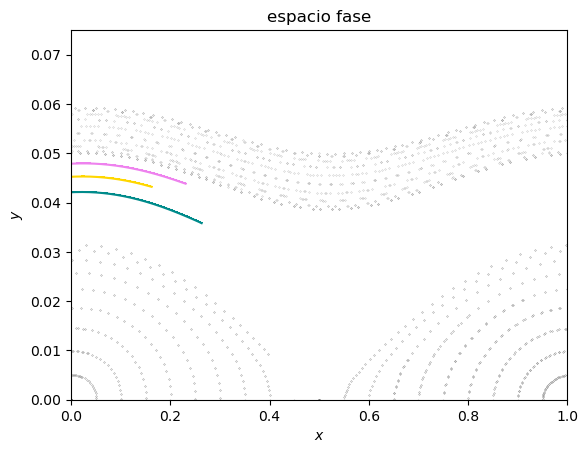

(0.0, 0.075)

In [297]:
evaluar(Ws29, [-0.25,0.0],1.0e-4,periodo29E1,colores1[5])
evaluar(Ws26, [-0.23,0.0],1.0e-4,periodo26E1,colores1[6])
evaluar(Ws24, [-0.25,0.0],1.0e-4,periodo24E1,colores1[7])
#scatter(listaper60[1],listaper60[2],marker ="+")
#scatter(listaper80[1],listaper80[2],marker ="+")
GraficarEstandarMap(Estandar1)
xlim(0,1)
ylim(0.0,0.075)


In [316]:
delta_t_1 =1.0e-4
ErrorS29 = CalculoError(compo29,1.0, Ws29,fs29,[-0.42,0.42],delta_t_1)
ErrorU29 = CalculoError(compo29,1., Wu29,fu29,[-0.2,0.2],delta_t_1);
ErrorS26 = CalculoError(compo26,1., Ws26,fs26,[-0.2,0.2],delta_t_1)
ErrorU26 = CalculoError(compo26,1., Wu26,fu26,[-0.2,0.2],delta_t_1);
ErrorS24 = CalculoError(compo24,1., Ws24,fs24,[-0.42,0.42],delta_t_1)
ErrorU24 = CalculoError(compo24,1., Wu24,fu24,[-0.42,0.42],delta_t_1);

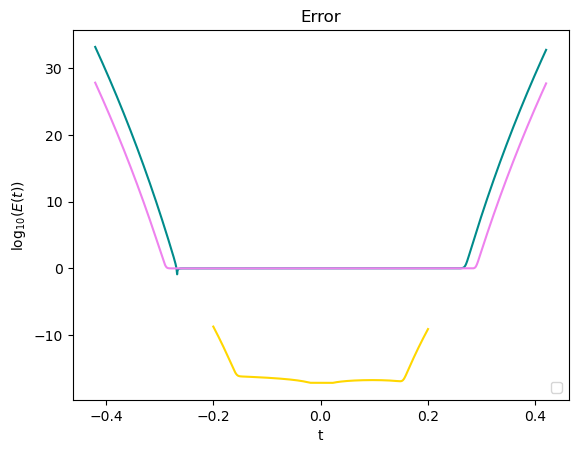

No handles with labels found to put in legend.


PyObject <matplotlib.legend.Legend object at 0x7f89eb91a0d0>

In [317]:

plot(ErrorS29[1],log10.(ErrorS29[2]),marker= "None", color=colores1[5])
plot(ErrorS26[1],log10.(ErrorS26[2]),marker= "None", color=colores1[6])
plot(ErrorS24[1],log10.(ErrorS24[2]),marker= "None", color=colores1[7])
#plot(ErrorU29[1],log10.(ErrorU29[2]),marker= "None", color="royalblue")
xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="lower right",fancybox="true" )

In [352]:
compo3(v) = composition(Estandar1,3)(v)
compo4(v) = composition(Estandar1,4)(v)
compo5(v) = composition(Estandar1,5)(v)
compo6(v) = composition(Estandar1,6)(v)
compo7(v) = composition(Estandar1,7)(v)
compo8(v) = composition(Estandar1,8)(v)
compo9(v) = composition(Estandar1,9)(v)
compo10(v) = composition(Estandar1,10)(v)
compo11(v) = composition(Estandar1,11)(v)
compo12(v) = composition(Estandar1,12)(v)
compo13(v) = composition(Estandar1,13)(v)
compo14b(v) = composition(Estandar1,14)(v)
compo15(v) = composition(Estandar1,15)(v)
compo16(v) = composition(Estandar1,16)(v)
compo17b(v) = composition(Estandar1,17)(v)
compo18(v) = composition(Estandar1,18)(v)
compo19(v) = composition(Estandar1,19)(v)

compo19 (generic function with 1 method)

In [359]:
function evaluacioniterada(mapeo, variedad, intervalo, noiteraciones,delta1, punto, color)
    for i in 1:noiteraciones
        fcompo(v) = composition(mapeo,i)(v)
        evaluar(fcompo(variedad),intervalo, delta1,punto,color)
    end
    return plot([0.0],[0.0])
end
        
        

evaluacioniterada (generic function with 1 method)

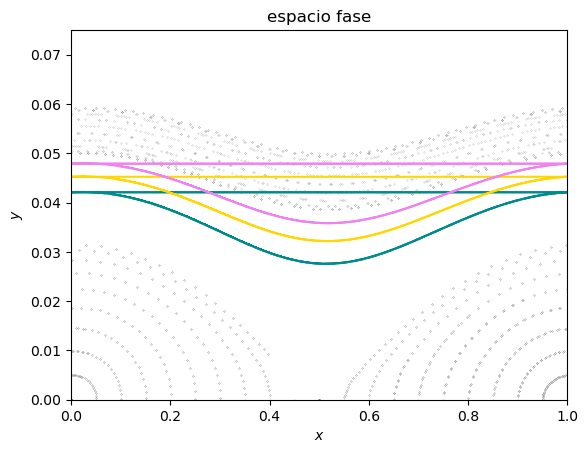

(0.0, 0.075)

In [416]:
evaluacioniterada(Estandar1,Ws29,[-0.1,0.0],28,1.0e-4,periodo29E1,"darkcyan")
evaluacioniterada(Estandar1,Ws26,[-0.1,0.0],25,1.0e-4,periodo26E1,colores1[6])
evaluacioniterada(Estandar1,Ws24,[-0.1,0.0],23,1.0e-4,periodo24E1,colores1[7])
GraficarEstandarMap(Estandar1)
xlim(0,1)
ylim(0.0,0.075)

In [426]:
function calculoerrorite(mapeo, noiteraciones,variedad,intervalo,delta1,fs, modulo)
    erroresL = []
    for i in 1:noiteraciones
        #fcompo(x,y) = composition(mapeo,i)(x,y)
        append!(erroresL, CalculoError(mapeo,modulo,variedad,fs,intervalo,delta1))
    end
    return erroresL
end
        
        

calculoerrorite (generic function with 1 method)

In [435]:
erroresp29 = calculoerrorite(Estandar1,28,Ws29,[-0.3,0.3],delta_t_1,fs29,1.0);
erroresp26 = calculoerrorite(Estandar1,25,Ws26,[-0.3,0.3],delta_t_1,fs26,1.0);
erroresp24 = calculoerrorite(Estandar1,23,Ws24,[-0.3,0.3],delta_t_1,fs24,1.0);

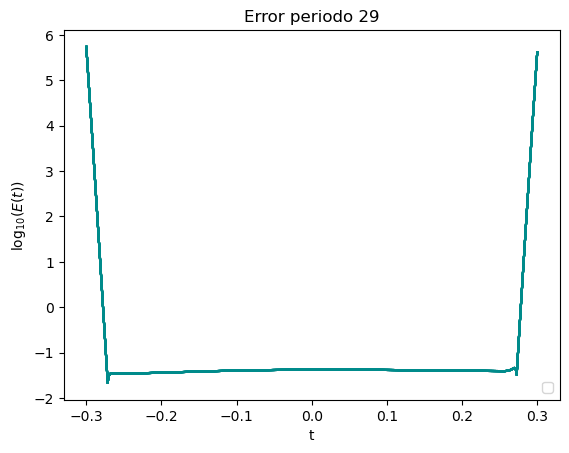

No handles with labels found to put in legend.


PyObject <matplotlib.legend.Legend object at 0x7f89ec81fb10>

In [436]:
for i in 0:25
    plot(erroresp29[2*i+1],log10.(erroresp29[2*i+2]),marker= "None", color=colores1[5])
end
xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error periodo 29")
#grid("on")
legend(loc="lower right",fancybox="true" )

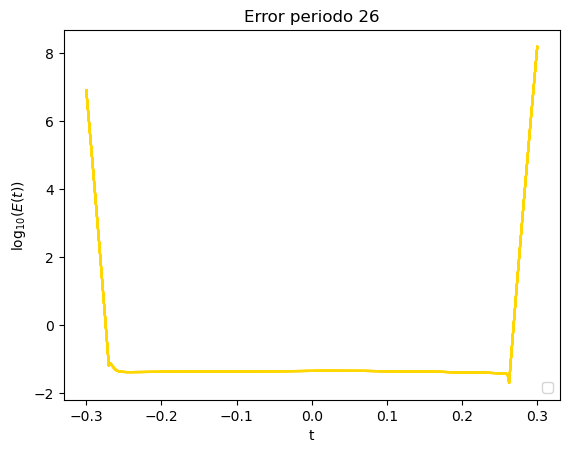

No handles with labels found to put in legend.


PyObject <matplotlib.legend.Legend object at 0x7f89ec81fa90>

In [437]:
for i in 0:12
    plot(erroresp26[2*i+1],log10.(erroresp26[2*i+2]),marker= "None", color=colores1[6])
end
xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error periodo 26")
#grid("on")
legend(loc="lower right",fancybox="true" )

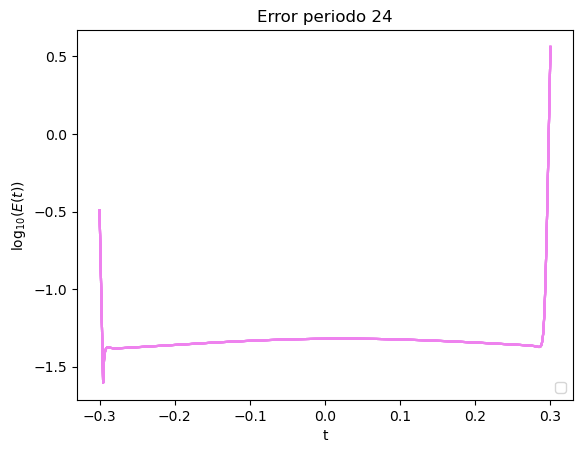

No handles with labels found to put in legend.


PyObject <matplotlib.legend.Legend object at 0x7f89e7003850>

In [438]:
for i in 0:10
    plot(erroresp24[2*i+1],log10.(erroresp24[2*i+2]),marker= "None", color=colores1[7])
end
xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error periodo 24")
#grid("on")
legend(loc="lower right",fancybox="true" )

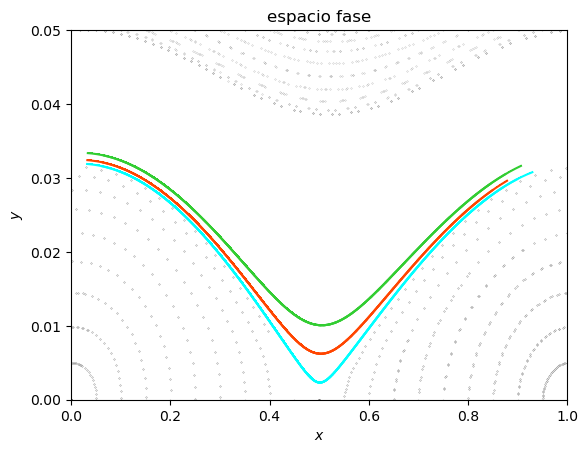

(0.0, 0.05)

In [450]:
evaluacioniterada(Estandar1,Ws80,[-0.1,0.0],74,1.0e-4,periodo29E1,colores1[1])
evaluacioniterada(Estandar1,Ws60,[-0.1,0.0],53,1.0e-4,periodo26E1,colores1[2])
#evaluacioniterada(Estandar1,Ws59,[-0.1,0.0],43,1.0e-4,periodo24E1,colores1[3])
evaluacioniterada(Estandar1,Ws50,[-0.1,0.0],44,1.0e-4,periodo24E1,colores1[4])
GraficarEstandarMap(Estandar1)
xlim(0,1)
ylim(0.0,0.05)

In [445]:
erroresp80 = calculoerrorite(Estandar1,68,Ws80,[-0.3,0.3],delta_t_1,fs80,1.0);
erroresp60 = calculoerrorite(Estandar1,45,Ws60,[-0.3,0.3],delta_t_1,fs60,1.0);
erroresp59 = calculoerrorite(Estandar1,43,Ws59,[-0.3,0.3],delta_t_1,fs59,1.0);
erroresp50 = calculoerrorite(Estandar1,40,Ws50,[-0.3,0.3],delta_t_1,fs50,1.0);

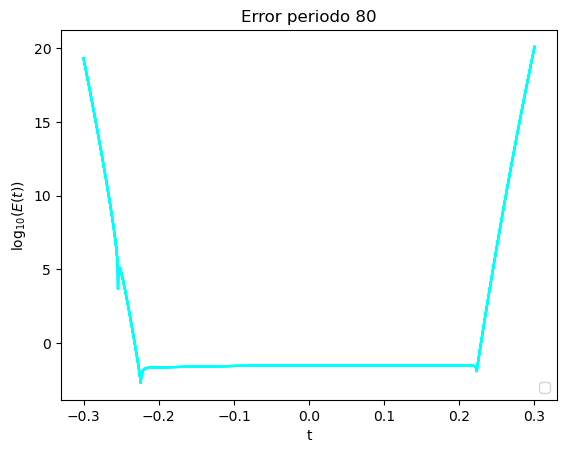

No handles with labels found to put in legend.


PyObject <matplotlib.legend.Legend object at 0x7f89eb22b850>

In [447]:
for i in 0:10
    plot(erroresp80[2*i+1],log10.(erroresp80[2*i+2]),marker= "None", color=colores1[1])
end
xlabel("t")
ylabel(L"$\log_{10}(E(t))$")
title("Error periodo 80")
#grid("on")
legend(loc="lower right",fancybox="true" )

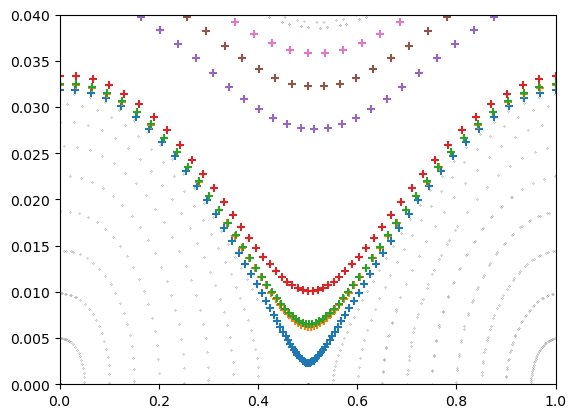

(0.0, 0.04)

In [451]:
scatter(listaper80[1],listaper80[2],marker ="+")
scatter(listaper60[1],listaper60[2],marker ="+")
scatter(listaper59[1],listaper59[2],marker ="+")
scatter(listaper50[1],listaper50[2],marker ="+")
scatter(listaper29[1],listaper29[2],marker ="+")
scatter(listaper26[1],listaper26[2],marker ="+")
scatter(listaper24[1],listaper24[2],marker ="+")
scatter(listaper17[1],listaper17[2],marker ="+")
scatter(listaper2[1],listaper2[2],marker ="+")

GraficarEstandarMap(Estandar1)
xlim(0,1)
ylim(0.0,0.04)

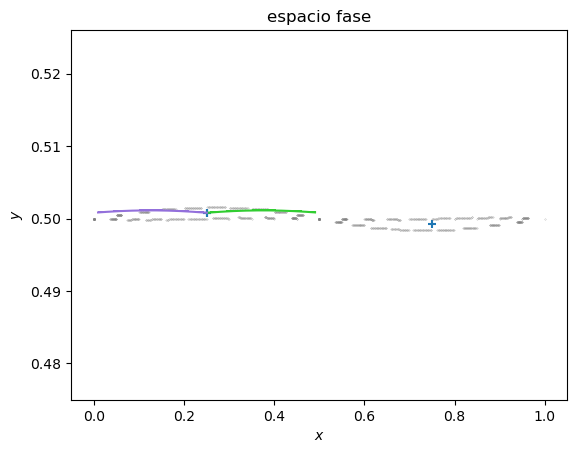

(0.475, 0.526)

In [281]:
evaluar(Ws2, [0.0,0.3],1.0e-3,periodo2E1,colores1[4])
evaluar(Wu2, [0.0,0.3],1.0e-3,periodo2E1,colores1[5])
scatter(listaper2[1],listaper2[2],marker ="+")
GraficarEstandarMap(Estandar1)
ylim(0.475,0.526)
#savefig("estandarp2k1_13.pdf", dpi=300)